In [1]:
import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

In [2]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
INPUT_SIZE = 28 
LR = 0.01
DOWNLOAD_MNIST = False

In [3]:
class RNNnet(nn.Module):
    def __init__(self):
        super(RNNnet, self).__init__()
        self.rnn = nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=64,  
            num_layers=1,
            batch_first=True
        )
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)
        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [5]:
# Mnist digits dataset
if not (os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    DOWNLOAD_MNIST = True

In [7]:
# 加载训练数据
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,
    transform=transforms.ToTensor(),
    download=DOWNLOAD_MNIST
    )

100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:46<00:00, 211334.79it/s]


Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 733808.83it/s]


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:05<00:00, 275799.31it/s]


Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



torch.Size([60000, 28, 28])
torch.Size([60000])


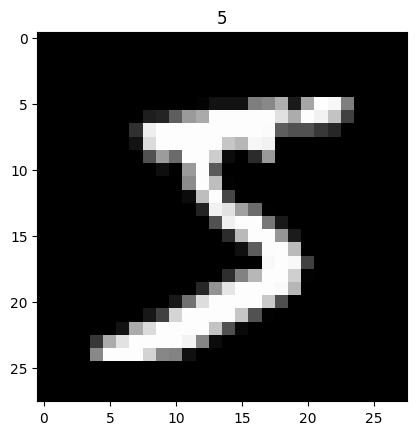

In [8]:
# plot one example
print(train_data.data.size())     # (60000, 28, 28)
print(train_data.targets.size())   # (60000)
plt.imshow(train_data.data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [9]:
train_loader = torch.utils.data.DataLoader(
        dataset=train_data,
        batch_size=BATCH_SIZE,
        shuffle=True
    )

In [10]:
# 加载测试数据
test_data = dsets.MNIST(root='./mnist/',
                        train=False,
                        transform=transforms.ToTensor()
                        )
test_x = test_data.data.type(torch.FloatTensor)[:2000]/255.
test_y = test_data.targets.numpy()[:2000]

rnn = RNNnet()
print(rnn)

RNNnet(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [11]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [13]:
# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):
        b_x = b_x.view(-1, 28, 28) 
        output = rnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 

        if step % 50 == 0:
            test_output = rnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3180 | test accuracy: 0.12
Epoch:  0 | train loss: 0.9422 | test accuracy: 0.58
Epoch:  0 | train loss: 0.9379 | test accuracy: 0.68
Epoch:  0 | train loss: 0.7059 | test accuracy: 0.83
Epoch:  0 | train loss: 0.3940 | test accuracy: 0.85
Epoch:  0 | train loss: 0.4765 | test accuracy: 0.88
Epoch:  0 | train loss: 0.3025 | test accuracy: 0.88
Epoch:  0 | train loss: 0.3197 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1880 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2370 | test accuracy: 0.94
Epoch:  0 | train loss: 0.3781 | test accuracy: 0.94
Epoch:  0 | train loss: 0.4899 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2359 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0758 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1473 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1262 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0683 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1864 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1377 | test accuracy

Epoch:  8 | train loss: 0.0344 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0835 | test accuracy: 0.98
Epoch:  8 | train loss: 0.0644 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0267 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0650 | test accuracy: 0.98
Epoch:  8 | train loss: 0.0508 | test accuracy: 0.98
Epoch:  8 | train loss: 0.0318 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0054 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0419 | test accuracy: 0.97
Epoch:  8 | train loss: 0.2232 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0123 | test accuracy: 0.98
Epoch:  8 | train loss: 0.0572 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0307 | test accuracy: 0.98
Epoch:  8 | train loss: 0.0509 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0901 | test accuracy: 0.97
Epoch:  8 | train loss: 0.0228 | test accuracy: 0.98
Epoch:  9 | train loss: 0.1165 | test accuracy: 0.97
Epoch:  9 | train loss: 0.1855 | test accuracy: 0.97
Epoch:  9 | train loss: 0.0138 | test accuracy

In [14]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
